In [1]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

In [2]:
car_df= pd.read_csv(r'C:\Users\user\Downloads\car data.csv')
car_df

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [3]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [4]:
car_df.isna().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

In [5]:
car_df.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [6]:
#Check out the values of categorial dataset
print(car_df.Car_Name.value_counts())

Car_Name
city                        26
corolla altis               16
verna                       14
fortuner                    11
brio                        10
                            ..
Honda CB Trigger             1
Yamaha FZ S                  1
Bajaj Pulsar 135 LS          1
Activa 4g                    1
Bajaj Avenger Street 220     1
Name: count, Length: 98, dtype: int64


In [7]:
print(car_df.Fuel_Type.value_counts())

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64


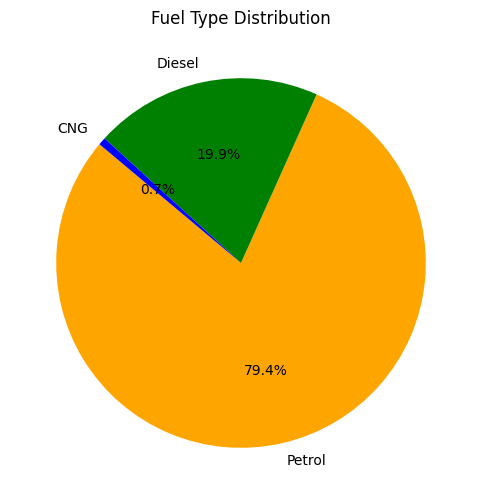

In [8]:
# Data for the pie chart
labels = ['Petrol', 'Diesel', 'CNG']
sizes = [239, 60, 2]
colors = ['Orange', 'Green', 'Blue']

# Create the pie chart
plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Fuel Type Distribution')
plt.show()

In [9]:
print(car_df.Selling_type.value_counts())


Selling_type
Dealer        195
Individual    106
Name: count, dtype: int64


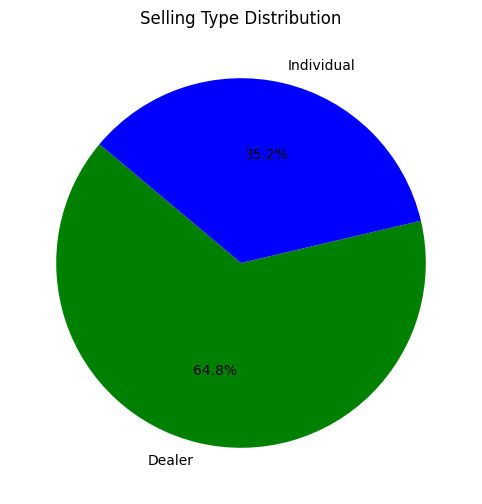

In [10]:
labels = ['Dealer', 'Individual']
sizes = [195, 106]
colors = ['Green', 'Blue']
plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Selling Type Distribution')
plt.show()

In [11]:
print(car_df.Transmission.value_counts())

Transmission
Manual       261
Automatic     40
Name: count, dtype: int64


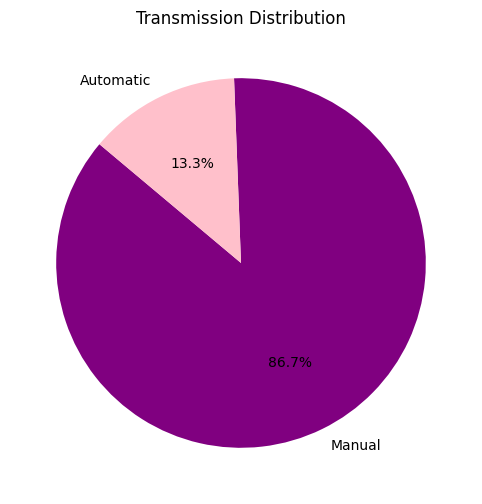

In [12]:
labels = ['Manual', 'Automatic']
sizes = [261, 40]
colors = ['purple', 'pink']
plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Transmission Distribution')
plt.show()

IndexError: index 3 is out of bounds for axis 0 with size 3

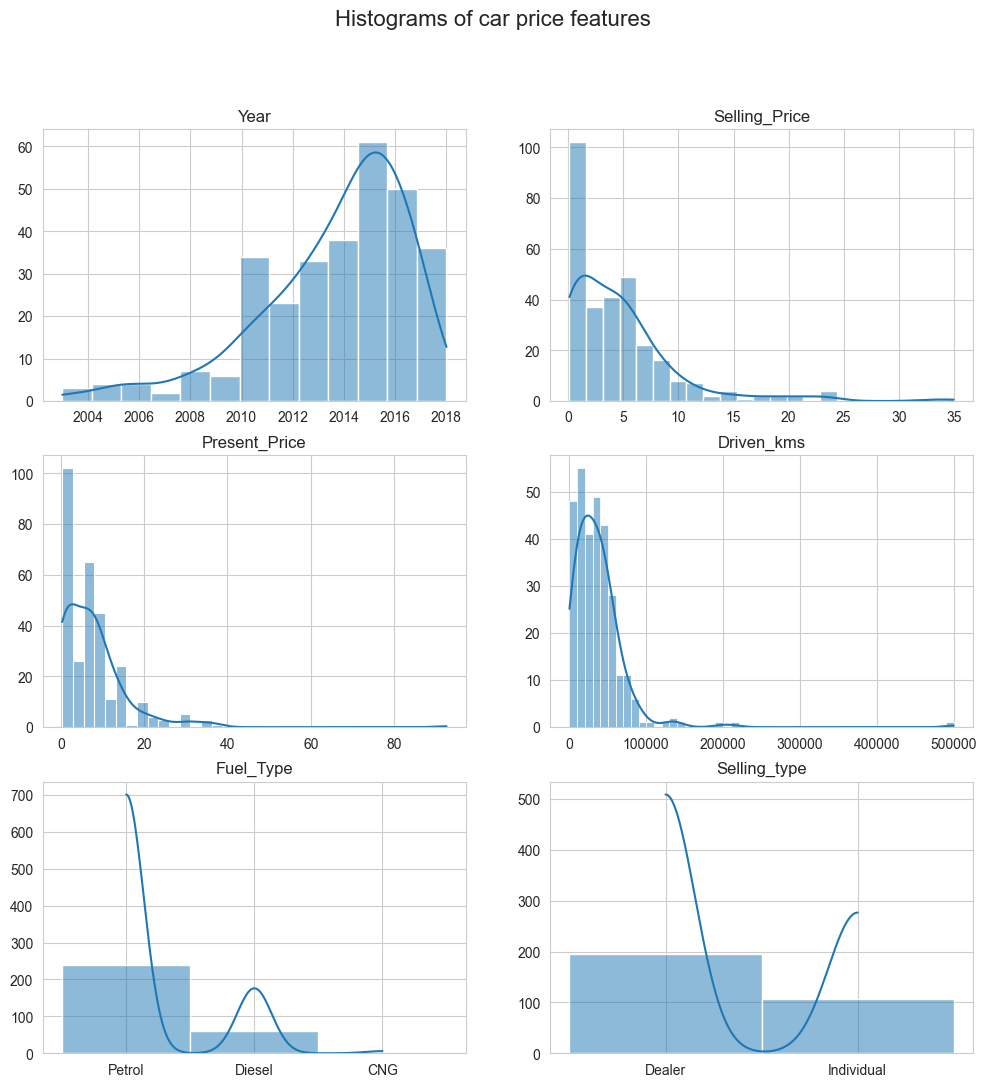

In [13]:
# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Create histograms for the numerical columns
fig, axes = plt.subplots(nrows = 3, ncols = 2, figsize=(12, 12))
fig.suptitle('Histograms of car price features', fontsize=16)

cols = ['Year', 'Selling_Price', 'Present_Price', 'Driven_kms',
       'Fuel_Type', 'Selling_type', 'Transmission']

for i, col in enumerate(cols):
    sns.histplot(car_df[col], kde=True, ax=axes[i//2, i%2])
    axes[i//2, i%2].set_title(col)
    axes[i//2, i%2].set_xlabel('')
    axes[i//2, i%2].set_ylabel('')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [14]:
#Encode the categorical dataset
data_dummy = car_df.copy()
data_dummy['Fuel_Type']= data_dummy['Fuel_Type'].map({'Petrol':0, 'Diesel':1, 'CNG':2})
data_dummy['Selling_type']= data_dummy['Selling_type'].map({'Dealer':0, 'Individual':1})
data_dummy['Transmission']= data_dummy['Transmission'].map({'Manual':0, 'Automatic':1})
data_dummy

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,1,0,0,0
297,brio,2015,4.00,5.90,60000,0,0,0,0
298,city,2009,3.35,11.00,87934,0,0,0,0
299,city,2017,11.50,12.50,9000,1,0,0,0


In [20]:
#STANDARDIZE THE DATA
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()

In [21]:
#Declare inputs(x) and targets(y)
data_preprocessed=data_dummy
inputs_X= data_preprocessed.drop(['Selling_Price', 'Car_Name', 'Owner'], axis= 1)
inputs_X

,Year,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission
0,2014,5.59,27000,0,0,0
1,2013,9.54,43000,1,0,0
2,2017,9.85,6900,0,0,0
3,2011,4.15,5200,0,0,0
4,2014,6.87,42450,1,0,0
...,...,...,...,...,...,...
296,2016,11.60,33988,1,0,0
297,2015,5.90,60000,0,0,0
298,2009,11.00,87934,0,0,0
299,2017,12.50,9000,1,0,0


In [22]:
scaler.fit(inputs_X)

StandardScaler()

In [23]:
target_y= data_preprocessed['Selling_Price']
target_y

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64

In [24]:
scaler.transform(inputs_X)

array([[ 0.128897  , -0.23625646, -0.25622446, -0.50018321, -0.73728539,
        -0.39148015],
       [-0.21751369,  0.22154386,  0.1559105 ,  1.85224094, -0.73728539,
        -0.39148015],
       [ 1.16812909,  0.25747249, -0.77396901, -0.50018321, -0.73728539,
        -0.39148015],
       ...,
       [-1.60315648,  0.39075613,  1.31334003, -0.50018321, -0.73728539,
        -0.39148015],
       [ 1.16812909,  0.56460435, -0.7198763 ,  1.85224094, -0.73728539,
        -0.39148015],
       [ 0.8217184 , -0.20032783, -0.81095812, -0.50018321, -0.73728539,
        -0.39148015]])

In [25]:
#Split data into train and test test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(scaled_inputs,target_y, test_size= 0.2, random_state=30)

NameError: name 'scaled_inputs' is not defined

In [ ]:
#Create the model (regression)
reg=LinearRegression()
reg.fit(x_train, y_train)

In [ ]:
#Training data prediction
y_hat = reg.predict(x_test)
y_hat

In [ ]:
import sklearn.metrics as metrics
from sklearn.metrics import r2_score
LinearRegression_MAE = print("Mean absolute error: %.2f" % np.mean(np.absolute(y_hat - y_test)))
LinearRegression_MSE = print("Residual sum of squares (MSE): %.2f" % np.mean((y_hat - y_test) ** 2))
LinearRegression_R2 = print("R2-score: %.2f" % r2_score(y_test , y_hat))

In [ ]:
Report =  {
    'Metric': ['Mean Absolute Error (MAE)', 'Mean Squared Error (MSE)', 'R-squared (R²)'],
    'Value': [1.79, 7.76, 0.82]
}
metrics_df = pd.DataFrame(Report)
print(metrics_df)